In [6]:
!ls

EDA-Earth-Advocacy-Project-2015.ipynb
EDA-PCA-KNN-Earth-Advocacy-Project-2015.ipynb
Earth-Advocacy-Project-2015.ipynb
Error-Col-Cleaning-Earth-Advocacy-Project-2015.ipynb
Feature-Engineering-Earth-Advocacy-Project-2015.ipynb
Feature-Selection-Earth-Advocacy-Project-2015.ipynb
Modeling .ipynb
Models.ipynb
Spark-Notes.ipynb
all_modeling_data.csv
clean_data.csv
clean_data_to_merge.csv
feature_engineered_ankoor.csv
images
iris.dot
iris.png
jurisdiction_geo.csv
mike_reduced_data.csv
modeling_column.csv
modeling_data.csv
new_final_merged_data.csv
old merged data
processed_data
program_key.csv
raw_data
tree.dot
tree.png


In [7]:
import pandas as pd
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 400)

import numpy as np
import scipy as sp

# Plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Image
from IPython.core.display import Image

In [8]:
# Load data
data = pd.read_csv('all_modeling_data.csv')
print '# Rows: {}, and # Columns, {}'.format(data.shape[0], data.shape[1])

# Rows: 378, and # Columns, 74


In [9]:
# Data has infinity values: replace +inf and -inf with NaN
data = data.replace([np.inf, -np.inf], np.nan)

In [10]:
cols = data.columns.tolist()
for i, j in enumerate(cols):
    print i, '-->', j

0 --> County
1 --> Jurisdiction
2 --> Longitude
3 --> Latitude
4 --> Target_ResPPD_2013
5 --> Annual_ResPPD_2013
6 --> Target_EmpPPD_2013
7 --> Annual_EmpPPD_2013
8 --> Log_Target_ResPPD_2013
9 --> Log_Annual_ResPPD_2013
10 --> Log_Target_EmpPPD_2013
11 --> Log_Annual_EmpPPD_2013
12 --> Diversity_Index
13 --> Voter_Registration_Rate
14 --> Rep_Dem_Ratio
15 --> Major_Minor_Crime_Ratio
16 --> Percent_Violent
17 --> TotCrime/1000People
18 --> Crime_Index
19 --> HH_Income_Ratio
20 --> Fam_Income_Ratio
21 --> gMean_Income_Index
22 --> PerCapitaIncome_Index
23 --> Travel_Time_Index
24 --> gMedian_Income_Index
25 --> MF_MedianEarnings_Index
26 --> Solar_ResUnits/Person
27 --> Solar_ResUnits/HH
28 --> MeanTravelTimetoWork
29 --> PercentLvgHmBefore8am
30 --> PercentNotDrivingAlonetoWork
31 --> PercentWorkingOOState
32 --> PercentWorkingOOCounty
33 --> PercentLessThan3CarsAvail
34 --> MedEarningsBachelorsDeg
35 --> PercentTotalwBachDegUnder45
36 --> PercentTotalHSGradUnder45
37 --> Percent18to24

## PCA

In [11]:
# PCA
from sklearn.decomposition import PCA
pca = PCA()

In [12]:
temp = data.copy() # Precaution to not modify source dataframe

# X cols
x = temp.columns.tolist()[12:57] # Subset data by selecting x cols
temp_x = temp[x]

# Replace NaN's with median values
temp_x = temp_x.fillna(temp_x.median())

# Standardization: rendering data with zero mean and standard deviation 1
x_std = (temp_x - temp_x.mean(axis = 0))/temp_x.std(axis = 0)

In [13]:
transform = pca.fit_transform(x_std)

In [14]:
# Explained Variance 
pca.explained_variance_ratio_.sum()

0.99999999999999989

In [15]:
# Check the dimensions
print pca.explained_variance_ratio_.shape[0]

# Multiply Explained Variance Ratio with 100 to get %
print pca.explained_variance_ratio_*100

print "First 10 PC's explain %0.2f percent of data" % (pca.explained_variance_ratio_[:10].sum() * 100)

45
[  2.46768984e+01   1.16869406e+01   8.75787904e+00   7.21967151e+00
   5.19877024e+00   4.37532588e+00   3.78911520e+00   3.48055190e+00
   2.84203755e+00   2.63770178e+00   2.12951809e+00   2.11236666e+00
   1.95430056e+00   1.71162398e+00   1.66452607e+00   1.50561021e+00
   1.33718517e+00   1.26020905e+00   1.14786415e+00   1.08282044e+00
   9.89432552e-01   9.14509969e-01   9.05745727e-01   8.63251625e-01
   7.41439086e-01   7.08135578e-01   6.47756268e-01   6.21884506e-01
   5.45841376e-01   4.87792783e-01   3.87970109e-01   3.36848835e-01
   2.82743713e-01   2.26978362e-01   2.02762310e-01   1.36859341e-01
   1.11747411e-01   8.18746978e-02   6.61770476e-02   6.23432103e-02
   3.29965738e-02   2.97196821e-02   2.79105123e-02   1.62192712e-02
   1.42937700e-04]
First 10 PC's explain 74.66 percent of data


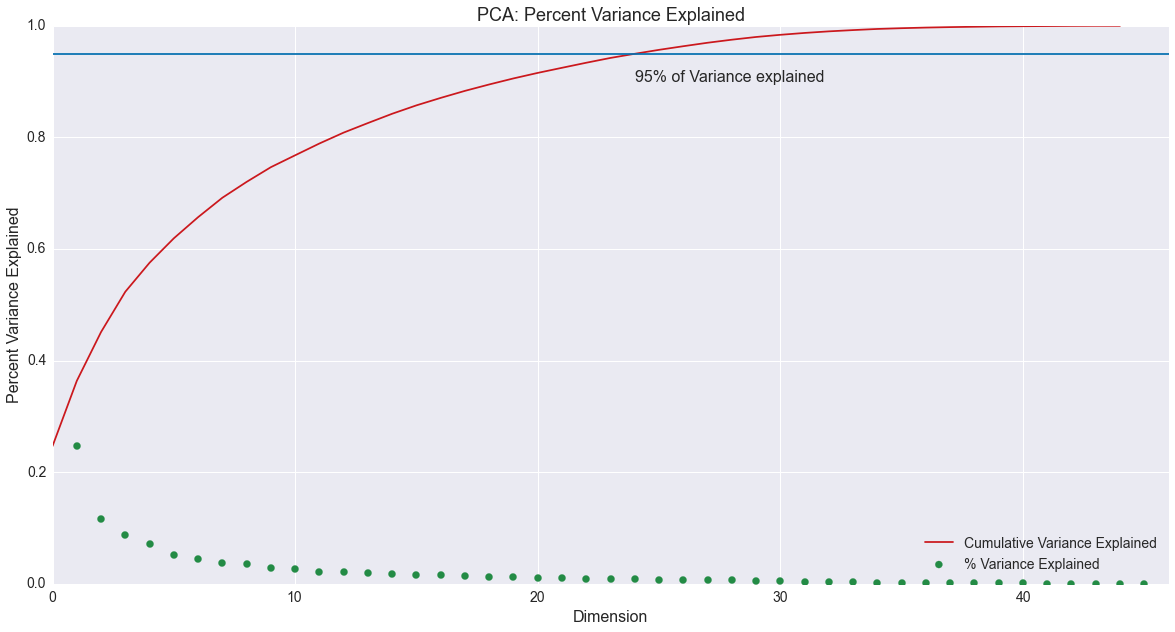

In [16]:
# Plot Variance Explained
plt.figure(figsize = (20, 10))
plt.scatter(range(1, pca.explained_variance_ratio_.shape[0]+1), pca.explained_variance_ratio_, s = 50, 
            color = '#238b45', label = '% Variance Explained')
plt.plot(np.cumsum(pca.explained_variance_ratio_), color = '#cb181d', label = 'Cumulative Variance Explained')
plt.xlabel("Dimension", fontsize = 16)
plt.ylabel("Percent Variance Explained", fontsize = 16)
plt.xlim(0, pca.explained_variance_ratio_.shape[0]+1)
plt.ylim(0,1)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(prop={'size': 14}, loc = 4)
plt.title('PCA: Percent Variance Explained', fontsize = 18)
# Plotting n = 75
plt.axhline(y = 0.95, color = '#0570b0')
plt.text(24, 0.9, '95% of Variance explained', fontsize = 16)
plt.show()

In [17]:
# Create a dataframe with features labeled pc-1, pc-2...
pcdf = pd.DataFrame({'annual_y': temp['Annual_ResPPD_2013'], 'target_y': temp['Target_ResPPD_2013']})

# Populate the dataframe with PC's 
for i in range(pca.explained_variance_ratio_.shape[0]):
    pcdf['pc-%i' % (i+1)] = transform[:, i] 
    
pcdf.head(3)

,annual_y,target_y,pc-1,pc-2,pc-3,pc-4,pc-5,pc-6,pc-7,pc-8,pc-9,pc-10,pc-11,pc-12,pc-13,pc-14,pc-15,pc-16,pc-17,pc-18,pc-19,pc-20,pc-21,pc-22,pc-23,pc-24,pc-25,pc-26,pc-27,pc-28,pc-29,pc-30,pc-31,pc-32,pc-33,pc-34,pc-35,pc-36,pc-37,pc-38,pc-39,pc-40,pc-41,pc-42,pc-43,pc-44,pc-45
0,3.2,6.9,5.119048,-1.536504,-0.972457,0.971958,-0.590349,-0.148600,2.217911,-0.677026,-0.893152,0.240184,-0.286476,-0.095575,-0.707715,1.099256,-0.703384,1.010267,0.639452,-0.369760,0.961435,0.771408,0.819154,-0.535445,-0.472926,0.710974,-0.329633,-0.536915,0.893313,-0.587091,-0.443689,0.160078,-0.339437,0.338358,-0.321292,-0.589814,-0.135563,-0.472069,0.097681,0.089863,0.430287,0.045407,0.022793,-0.034559,0.085920,-0.129562,-0.001955
1,5.5,7.0,-4.208079,1.090680,0.454950,0.852127,-0.434219,-0.300709,-0.327326,-0.992515,-0.071061,-0.388597,-0.158079,-0.395168,-0.432395,0.524950,-0.838048,0.762529,0.133938,-0.435307,-0.365676,0.195430,-0.314780,0.338676,-0.233556,-0.681920,-0.422912,0.338612,-0.106537,0.149283,-0.216417,-0.527706,0.088814,0.129302,0.478144,-0.121726,-0.143234,-0.011674,0.123177,0.008357,0.279410,0.077496,0.021314,0.006196,0.001501,-0.097419,-0.003893
2,2.6,5.5,-1.895973,-1.712579,-1.293190,-1.168563,1.200652,-0.697726,1.547200,-0.127860,-0.725715,-0.576194,-0.197214,-0.816442,0.196406,0.540721,0.431687,0.449036,0.831761,-0.140359,0.013129,0.288929,0.407565,-0.033978,-0.995958,0.459697,0.182338,-0.897586,0.421964,-0.110649,-0.072354,0.052866,0.328048,-0.115290,-0.013185,0.258976,-0.123604,0.017392,0.069083,-0.085083,-0.109424,0.046497,-0.027703,0.075938,-0.045753,0.018102,-0.000063


## SVD

In [18]:
# X
X = x_std
print X.shape

# Perform SVD
U, D, V = np.linalg.svd(X) # U, D, V = scipy.lianalg.svd(X, full_matrices = False)
print U.shape
print D.shape
print V.shape

var_exp = D**2/sum(D**2)
print 'The first component explains %0.2f%% of the variance' % (var_exp[0] * 100)
print 'The second component explains %0.2f%% of the variance' % (var_exp[1] * 100)

(378, 45)
(378, 378)
(45,)
(45, 45)
The first component explains 24.68% of the variance
The second component explains 11.69% of the variance


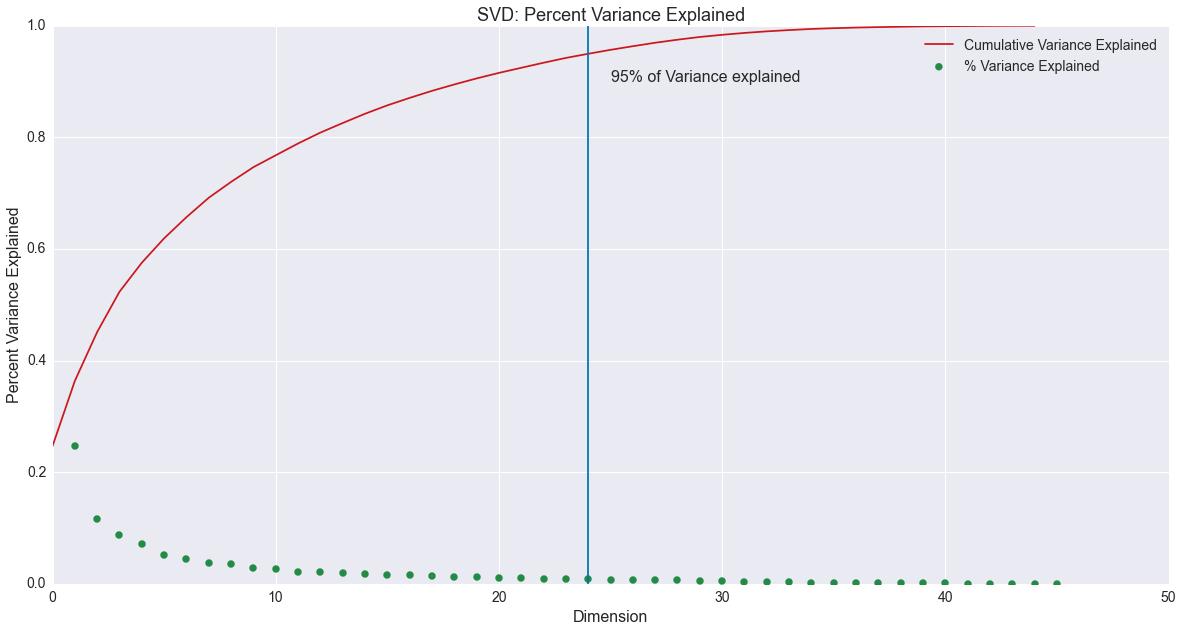

In [19]:
# Plot Variance Explained
plt.figure(figsize = (20, 10))
plt.scatter(range(1, len(D)+1), D**2/np.sum(D**2), s = 50, color = '#238b45', label = '% Variance Explained')
plt.plot(np.cumsum(D**2/np.sum(D**2)), color = '#cb181d', label = 'Cumulative Variance Explained')
plt.xlabel("Dimension", fontsize = 16)
plt.ylabel("Percent Variance Explained", fontsize = 16)
plt.xlim(0, 50)
plt.ylim(0, 1.0)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(prop={'size': 14})
plt.title('SVD: Percent Variance Explained', fontsize = 18)
# Plotting n = 75
plt.axvline(x = 24, color = '#0570b0')
plt.text(24 + 1, 0.9, '95% of Variance explained', fontsize = 16)
plt.show()

## KMeans

In [20]:
pca = PCA()

temp = data.copy() # Precaution to not modify source dataframe

# X cols
x = temp.columns.tolist()[12:57] # Subset data by selecting x cols
temp_x = temp[x]

# Replace NaN's with median values
temp_x = temp_x.fillna(temp_x.median())

# Standardization: rendering data with zero mean and standard deviation 1
x_std = (temp_x - temp_x.mean(axis = 0))/temp_x.std(axis = 0)


transform = pca.fit_transform(x_std)

In [21]:
from sklearn.cluster import KMeans
from sklearn import metrics

# Select PC's
pcs = pcdf.columns.tolist()[3:]

# Get values (numpy array) 
#x_km = pcdf[pcs].values
#x_km = temp_x.values # Gives bad silhouette scores
x_km = x_std.values

### Silhouette analysis on KMeans Clustering

> Silhoette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

In [22]:
# Range of n_clusters
for i in range(2, 21):
    k_means = KMeans(n_clusters = i)
    k_means.fit(x_km)
    print 'Clusters: {} --> Silhouette Score: {}'.format(i, metrics.silhouette_score(x_km, k_means.labels_))

Clusters: 2 --> Silhouette Score: 0.157811910958
Clusters: 3 --> Silhouette Score: 0.158240773818
Clusters: 4 --> Silhouette Score: 0.167252258502
Clusters: 5 --> Silhouette Score: 0.121608727987
Clusters: 6 --> Silhouette Score: 0.0984841911879
Clusters: 7 --> Silhouette Score: 0.11148688855
Clusters: 8 --> Silhouette Score: 0.11008687687
Clusters: 9 --> Silhouette Score: 0.114451719313
Clusters: 10 --> Silhouette Score: 0.10821861012
Clusters: 11 --> Silhouette Score: 0.0992783390192
Clusters: 12 --> Silhouette Score: 0.0938175500019
Clusters: 13 --> Silhouette Score: 0.106006745632
Clusters: 14 --> Silhouette Score: 0.0998714916777
Clusters: 15 --> Silhouette Score: 0.0974728692983
Clusters: 16 --> Silhouette Score: 0.0983311161652
Clusters: 17 --> Silhouette Score: 0.103865292477
Clusters: 18 --> Silhouette Score: 0.0832316235733
Clusters: 19 --> Silhouette Score: 0.107180729927
Clusters: 20 --> Silhouette Score: 0.0930364260317


/Applications/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [23]:
# Create an instance of KMeans
k_means = KMeans(n_clusters = 3) # Select n_clusters 

# Fit data
k_means.fit(x_km)

# Check output labels
print set(k_means.labels_)

set([0, 1, 2])


In [24]:
# Create a dataframe with PC's
pcdf = pd.DataFrame({'y': k_means.labels_})

# Populate the dataframe with PC's 
for i in range(pca.explained_variance_ratio_.shape[0]):
    pcdf['pc-%i' % (i+1)] = transform[:, i] 

Number of points in cluster-0: 174
Number of points in cluster-1: 189
Number of points in cluster-2: 15


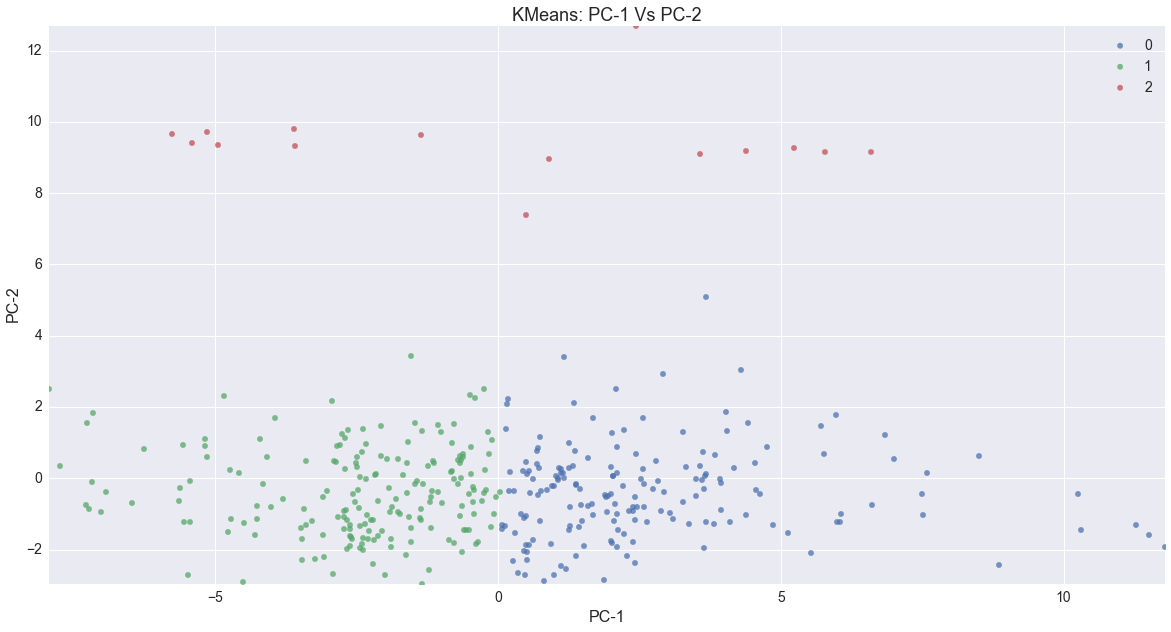

In [25]:
# Visualize clusters
# Plotting PC-1 and PC-2
c0 = sns.color_palette()[0]
c1 = sns.color_palette()[1]
c2 = sns.color_palette()[2]
c3 = sns.color_palette()[3]
c4 = sns.color_palette()[4]
c5 = sns.color_palette()[5]

colors = [c0, c1, c2, c3, c4, c5]

plt.figure(figsize = (20, 10))
for y, color in zip(pcdf['y'].unique(), colors):
    # Filter df by status
    mask = pcdf['y'] == y
    print 'Number of points in cluster-{}: {}'.format(y, sum(mask))
    plt.scatter(pcdf[mask]['pc-1'], pcdf[mask]['pc-2'], label = y, color = color, alpha = 0.75, s = 30)
    
plt.legend(prop={'size': 14}, loc = 1)
plt.xlabel("PC-1", fontsize = 16)
plt.ylabel("PC-2", fontsize = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.xlim(pcdf['pc-1'].min(), pcdf['pc-1'].max())
plt.ylim(pcdf['pc-2'].min(),pcdf['pc-2'].max())
plt.title('KMeans: PC-1 Vs PC-2', fontsize = 18)

In [26]:
temp['Label'] = k_means.labels_
temp.groupby(['Label'])['Annual_ResPPD_2013', 'Annual_EmpPPD_2013'].mean().reset_index()

,Label,Annual_ResPPD_2013,Annual_EmpPPD_2013
0,0,28.166474,16.187283
1,1,4.721164,12.906878
2,2,288.500000,14.600000


In [27]:
from sklearn.decomposition import PCA # PCA
from sklearn.lda import LDA # LDA
from sklearn.cluster import KMeans # KMeans
from sklearn import metrics # Silhouette score

def k_means_clustering(n, X):
    '''
    n = Number of clusters (up to 10). X is numpy array of features
    '''
    # KMeans
    k_means = KMeans(n_clusters = n)
    k_means.fit(X)
    s_score = metrics.silhouette_score(X, k_means.labels_)
    print 'Clusters: {} --> Silhouette Score: {}'.format(n, s_score)
    # LDA using labels from KMeans
    lda = LDA()
    lda_comp = lda.fit_transform(X, k_means.labels_)
    ldadf = pd.DataFrame({'label': k_means.labels_})
    # Populate the dataframe with LD's 
    for i in range(lda_comp.shape[1]):
        ldadf['ld-%i' % (i+1)] = lda_comp[:, i]
    # Set color
    c0 = sns.color_palette("Set2", 10)[0]
    c1 = sns.color_palette("Set2", 10)[1]
    c2 = sns.color_palette("Set2", 10)[2]
    c3 = sns.color_palette("Set2", 10)[3]
    c4 = sns.color_palette("Set2", 10)[4]
    c5 = sns.color_palette("Set2", 10)[5]
    c6 = sns.color_palette("Set2", 10)[6]
    c7 = sns.color_palette("Set2", 10)[7]
    c8 = sns.color_palette("Set2", 10)[8]
    c9 = sns.color_palette("Set2", 10)[9]

    colors = [c0, c1, c2, c3, c4, c5, c6, c7, c8, c9]
    plt.figure(figsize = (20, 10))
    for label, color in zip(ldadf['label'].unique(), colors):
        # Filter df by status
        mask = ldadf['label'] == label
        print 'Number of points in cluster-{}: {}'.format(label, sum(mask))
        plt.scatter(ldadf[mask]['ld-1'], ldadf[mask]['ld-2'], label = label, color = color, alpha = 0.85, s = 50)
        plt.xlabel("LD-1", fontsize = 16)
        plt.ylabel("LD-2", fontsize = 16)    
        plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
        plt.legend(prop={'size': 14})
        plt.title('LDA via KMeans ({} Clusters)'.format(n), fontsize = 18)
    return k_means.labels_

In [28]:
# Prepare data
temp = data

# Filter
#temp = temp[temp['Annual_ResPPD_2013'] < 1000]

x = temp.columns.tolist()[12:57] # Subset data by selecting x cols
temp_x = temp[x]

## 1. temp_x: Not normalized
# Replace NaN's with median values
temp_x = temp_x.fillna(temp_x.median())

## 2. x_std: normalized temp_x
# Standardization: rendering data with zero mean and standard deviation 1
x_std = (temp_x - temp_x.mean(axis = 0))/temp_x.std(axis = 0)

## 3. pcs: Principal Component
pca = PCA()
transform = pca.fit_transform(x_std)

# Create a dataframe with PC's
pcdf = pd.DataFrame(transform)

# Change column names
pc_names = []
for i in range(pca.explained_variance_ratio_.shape[0]):
    name = 'pc-%i' % (i+1)
    pc_names.append(name)   
pcdf.columns = pc_names

# Select PC's
pcs = pcdf.values

# Get values (numpy array) 
km_pcs = pcs # n_cluster: 3 or 4. After filtering only 3 looks good
km_temp = temp_x.values # Good Silhouette score but no good clusters.
km_std = x_std.values # n_cluster: 3 or 4. After filtering both look bad

Clusters: 4 --> Silhouette Score: 0.115522423452
Number of points in cluster-3: 53
Number of points in cluster-2: 123
Number of points in cluster-0: 186
Number of points in cluster-1: 16


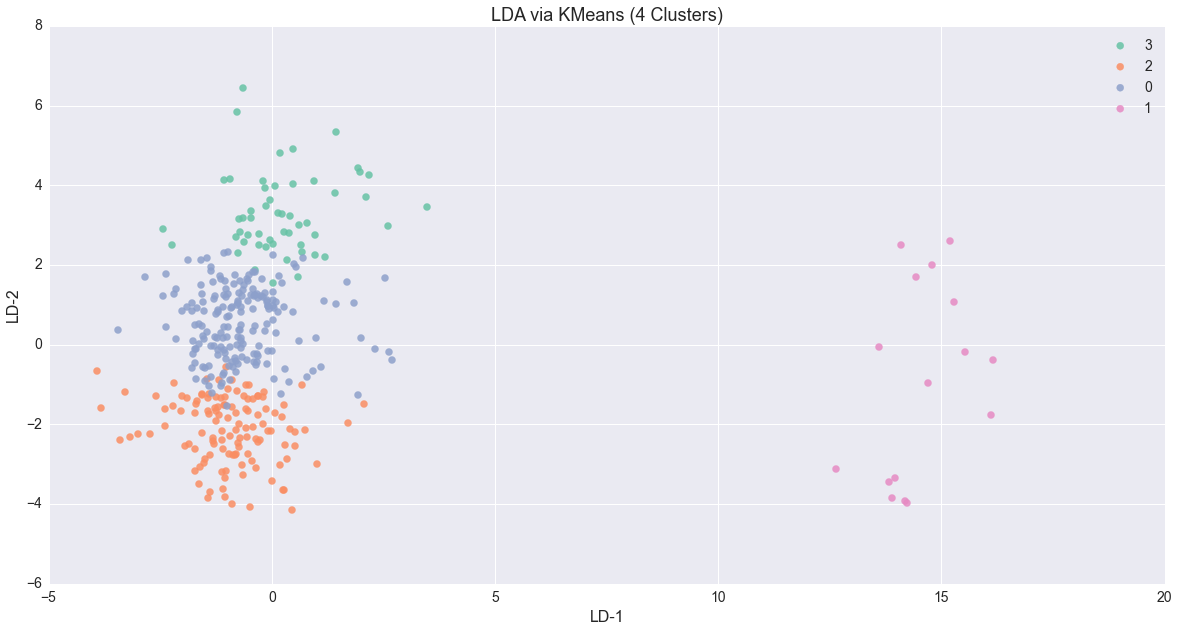

In [29]:
# Run function to visualize clusters to develop y-labels
y_labels = k_means_clustering(4, km_std)

## Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

- Does not require the number of clusters as input
- Need to tune two parameters: 
    - eps - Maximum distance between two data points to be considered in the same neighborhood
    - min_samples - Minimum amount of data points in a neighborhood to be considered a cluster

In [30]:
from sklearn.cluster import DBSCAN

from sklearn.datasets import load_iris
iris = load_iris()

# Create an instance of DBSCAN
dbscan = DBSCAN(random_state = 15, eps = 0.5) 

In [31]:
# Check parameters 
dbscan

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    min_samples=5, p=None, random_state=15)

In [32]:
# Fit iris data
dbscan.fit(iris.data)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    min_samples=5, p=None, random_state=15)

In [33]:
# Check the outcome labels: 
set(dbscan.labels_)

{-1, 0, 1}

In [34]:
# Visualizing the DBSCAN clusters
from sklearn.decomposition import PCA
pca = PCA()
iris_pc = pca.fit_transform(iris.data) 

In [35]:
# Create a dataframe with PC's
pca_iris = pd.DataFrame({'y': dbscan.labels_})

# Populate the dataframe with PC's 
for i in range(pca.explained_variance_ratio_.shape[0]):
    pca_iris['pc-%i' % (i+1)] = iris_pc[:, i] 

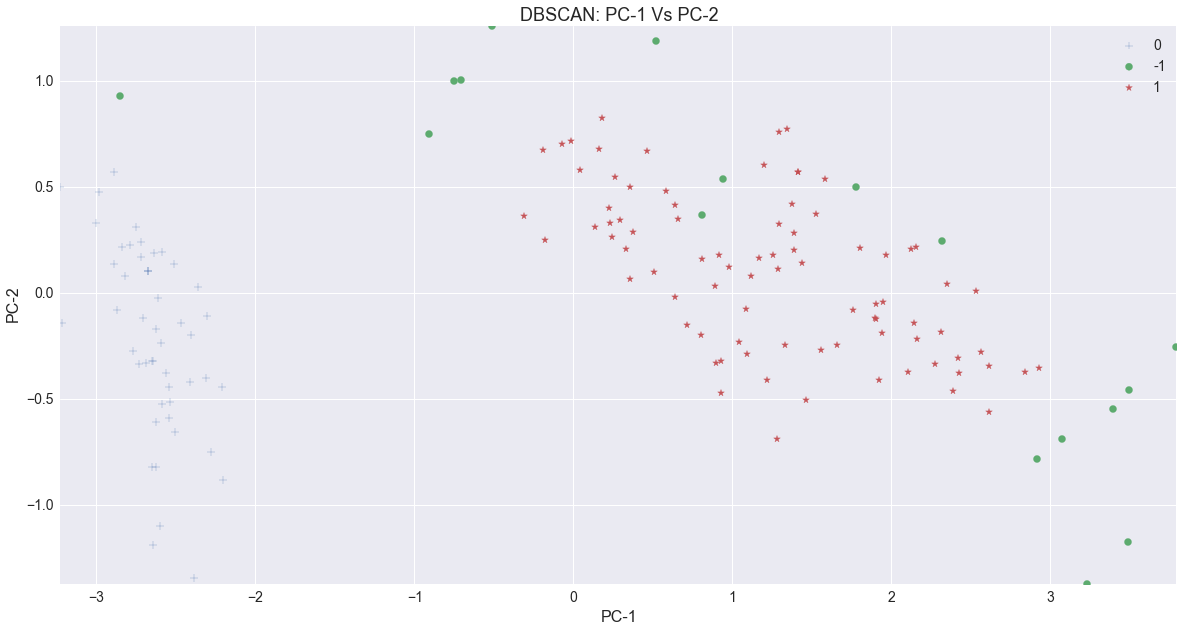

In [36]:
# Visualize clusters
# Plotting PC-1 and PC-2
c0 = sns.color_palette()[0]
c1 = sns.color_palette()[1]
c2 = sns.color_palette()[2]
colors = [c0, c1, c2]

markers = ['+', 'o', '*']

plt.figure(figsize = (20, 10))
for y, color, marker in zip(pca_iris['y'].unique(), colors, markers):
    # Filter df by status
    mask = pca_iris['y'] == y
    plt.scatter(pca_iris[mask]['pc-1'], pca_iris[mask]['pc-2'], label = y, color = color, marker = marker, alpha = 0.95, s = 50)
    
plt.legend(prop={'size': 14}, loc = 1)
plt.xlabel("PC-1", fontsize = 16)
plt.ylabel("PC-2", fontsize = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.xlim(pca_iris['pc-1'].min(), pca_iris['pc-1'].max())
plt.ylim(pca_iris['pc-2'].min(),pca_iris['pc-2'].max())
plt.title('DBSCAN: PC-1 Vs PC-2', fontsize = 18)

### <font color='red'>DBSCAN on Recycling Data</font>

In [37]:
# Create an instance of DBSCAN
dbscan = DBSCAN(random_state = 15, eps = 0.9) 

temp = data.copy() # Precaution to not modify source dataframe

# Filter
#temp = temp[temp['Annual_ResPPD_2013'] < 1000]

# X cols
x = temp.columns.tolist()[12:57] # Subset data by selecting x cols
temp_x = temp[x]

# Replace NaN's with median values
temp_x = temp_x.fillna(temp_x.median())

# Standardization: rendering data with zero mean and standard deviation 1
x_std = (temp_x - temp_x.mean(axis = 0))/temp_x.std(axis = 0)


# Fit data
dbscan.fit(x_std)

# Check the outcome labels: 
print set(dbscan.labels_)

set([-1])


In [38]:
transform = pca.fit_transform(x_std)

# Create a dataframe with PC's
pcdf = pd.DataFrame({'y': dbscan.labels_})

# Populate the dataframe with PC's 
for i in range(pca.explained_variance_ratio_.shape[0]):
    pcdf['pc-%i' % (i+1)] = transform[:, i] 

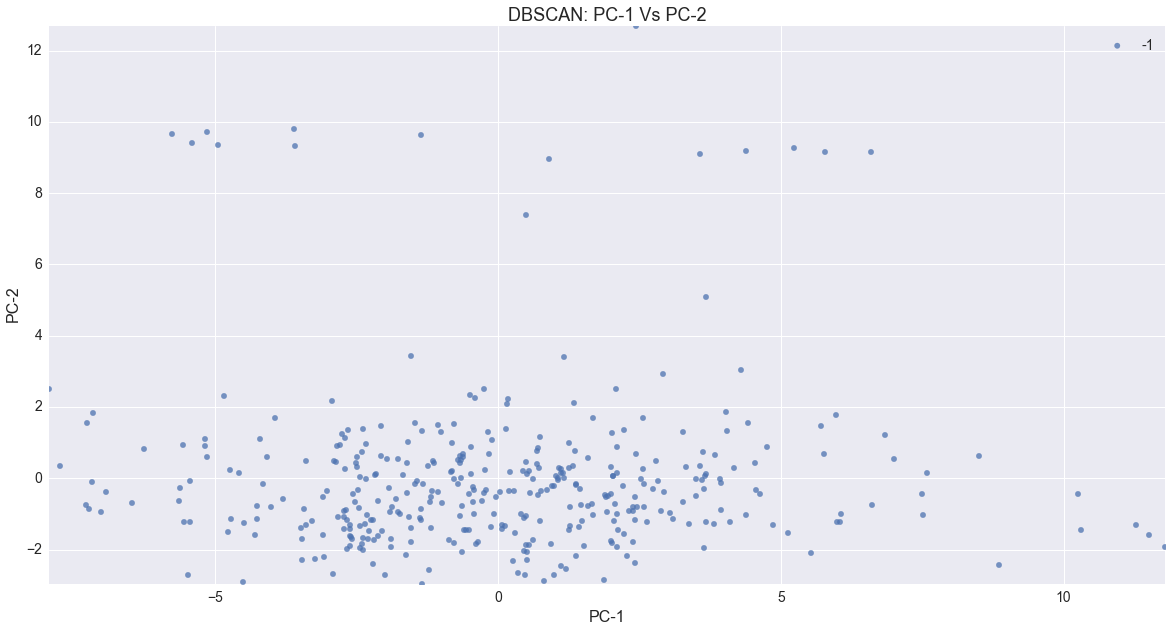

In [39]:
# Visualize clusters
# Plotting PC-1 and PC-2
c0 = sns.color_palette()[0]
c1 = sns.color_palette()[1]
c2 = sns.color_palette()[2]
colors = [c0, c1, c2]

plt.figure(figsize = (20, 10))
for y, color in zip(pcdf['y'].unique(), colors):
    # Filter df by status
    mask = pcdf['y'] == y
    plt.scatter(pcdf[mask]['pc-1'], pcdf[mask]['pc-2'], label = y, color = color, alpha = 0.75, s = 30)
    
plt.legend(prop={'size': 14}, loc = 1)
plt.xlabel("PC-1", fontsize = 16)
plt.ylabel("PC-2", fontsize = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.xlim(pcdf['pc-1'].min(), pcdf['pc-1'].max())
plt.ylim(pcdf['pc-2'].min(),pcdf['pc-2'].max())
plt.title('DBSCAN: PC-1 Vs PC-2', fontsize = 18)

## Decision Trees

In [40]:
# Iris Data 
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

In [41]:
# Visualize Tree: Need to install package from http://www.graphviz.org/
from sklearn.externals.six import StringIO
with open('iris.dot', 'w') as output_file:
    output_file = tree.export_graphviz(clf, out_file = output_file)

# dot -Tps filename.dot -o outfile.ps # where 'ps' is 
!dot -Tpng iris.dot > iris.png

### Recycling Data

Clusters: 4 --> Silhouette Score: 0.09442215143
Number of points in cluster-0: 95
Number of points in cluster-3: 113
Number of points in cluster-1: 155
Number of points in cluster-2: 15


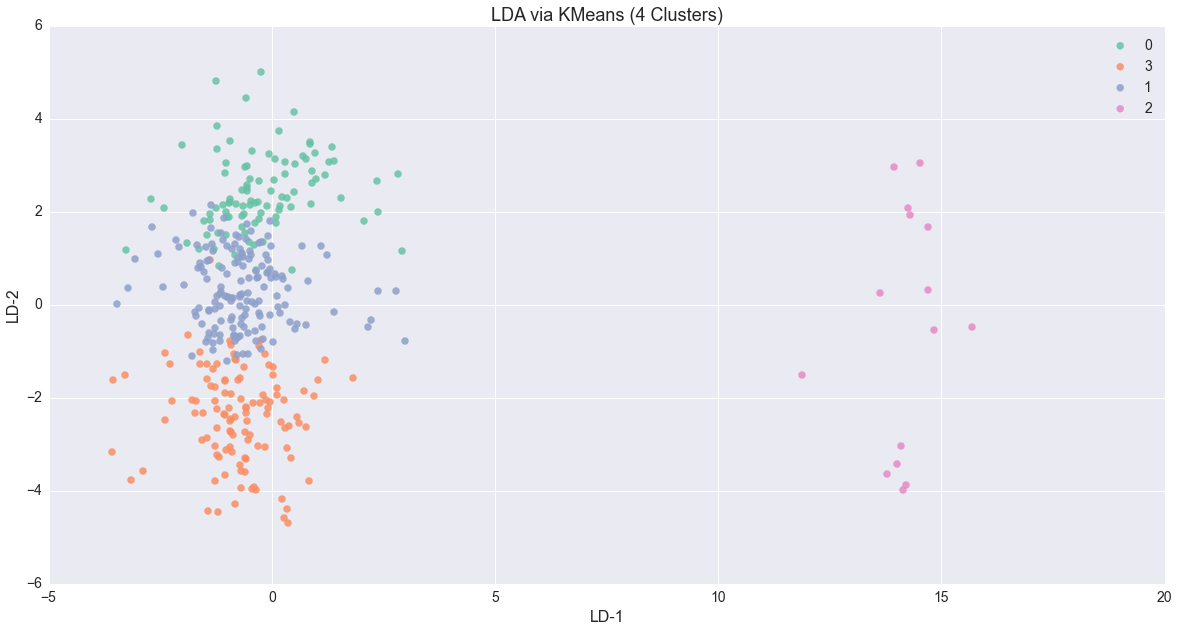

In [42]:
# Prepare data
temp = data
x = temp.columns.tolist()[12:57] # Subset data by selecting x cols
temp_x = temp[x]
# Replace NaN's with median values
temp_x = temp_x.fillna(temp_x.median())
x_std = (temp_x - temp_x.mean(axis = 0))/temp_x.std(axis = 0)

# Run function to visualize clusters to develop y-labels
y_labels = k_means_clustering(4, km_std)

In [43]:
temp['Label'] = y_labels
temp.groupby(['Label'])['Annual_ResPPD_2013', 'Annual_EmpPPD_2013'].mean().reset_index()

,Label,Annual_ResPPD_2013,Annual_EmpPPD_2013
0,0,46.377895,16.921053
1,1,5.198701,14.375325
2,2,288.500000,14.600000
3,3,4.943363,12.553097


In [44]:
# Create an instance of DT classifier
clf = tree.DecisionTreeClassifier()

# Fit Decision Trees
clf = clf.fit(temp_x, y_labels)

In [45]:
# Visualize Tree: Need to install package from http://www.graphviz.org/
from sklearn.externals.six import StringIO
with open('tree.dot', 'w') as output_file:
    output_file = tree.export_graphviz(clf, out_file = output_file)

# dot -Tps filename.dot -o outfile.ps # where 'ps' is file format
!dot -Tpng tree.dot > tree.png

In [46]:
for i, j in zip(temp_x.columns, clf.feature_importances_):
    if j > 0:
        print 'Feature: {} and Feature Importance: {}'.format(i,j)

Feature: Voter_Registration_Rate and Feature Importance: 0.0412471719882
Feature: Percent_Violent and Feature Importance: 0.0301548080173
Feature: Crime_Index and Feature Importance: 0.0111524163569
Feature: Fam_Income_Ratio and Feature Importance: 0.0148744099914
Feature: gMean_Income_Index and Feature Importance: 0.00390334572491
Feature: PerCapitaIncome_Index and Feature Importance: 0.342657253015
Feature: Travel_Time_Index and Feature Importance: 0.0150178989398
Feature: gMedian_Income_Index and Feature Importance: 0.0474536419435
Feature: MF_MedianEarnings_Index and Feature Importance: 0.252335411661
Feature: Solar_ResUnits/HH and Feature Importance: 0.0239079925651
Feature: PercentNotDrivingAlonetoWork and Feature Importance: 0.0219563197026
Feature: PercentLessThan3CarsAvail and Feature Importance: 0.00770119561941
Feature: Percent25andOverNotHSGrad and Feature Importance: 0.00187587974158
Feature: Percent25andOverBachDegorHigher and Feature Importance: 0.0466665088837
Feature: 

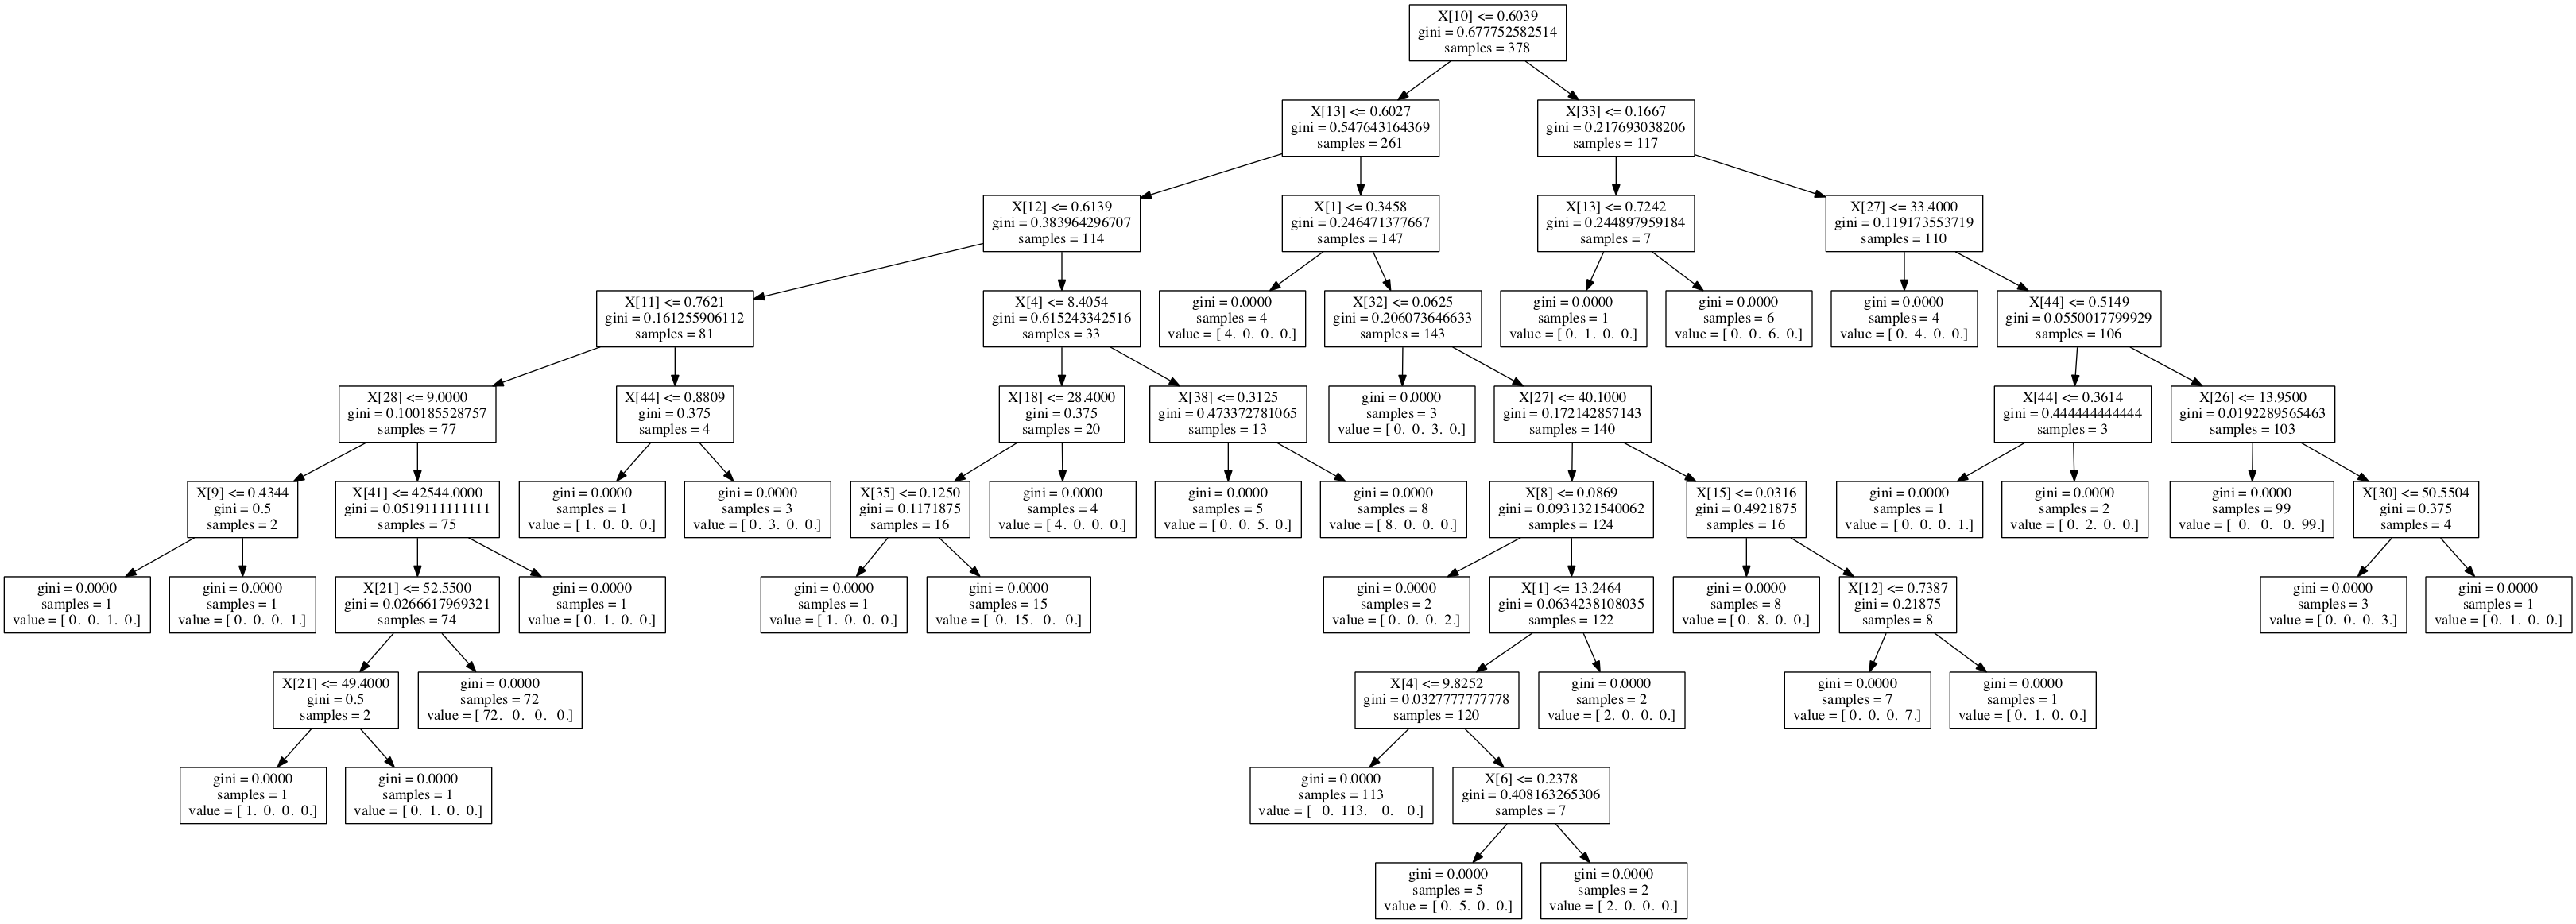

In [47]:
Image(filename = 'tree.png')

## Random Forest

The random forest adds randomness in two ways. First, it randomly resamples the data with replacement, so each decision tree is being fit on a slightly different set of data. Secondly, for each split in each decision tree, the random forests algorithm only considers a random subset of variables to split on. All trees are trained independently of each other. To make predictions, all trees are queried independently and the majority vote wins.

Ref: [Random Forest](https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm#varimp)

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

scores = []
for n in range(1, 51):
    clf = RandomForestClassifier(n_estimators = n)
    score_list = cross_val_score(clf, temp_x, y_labels, cv = 10)
    scores.append(score_list)

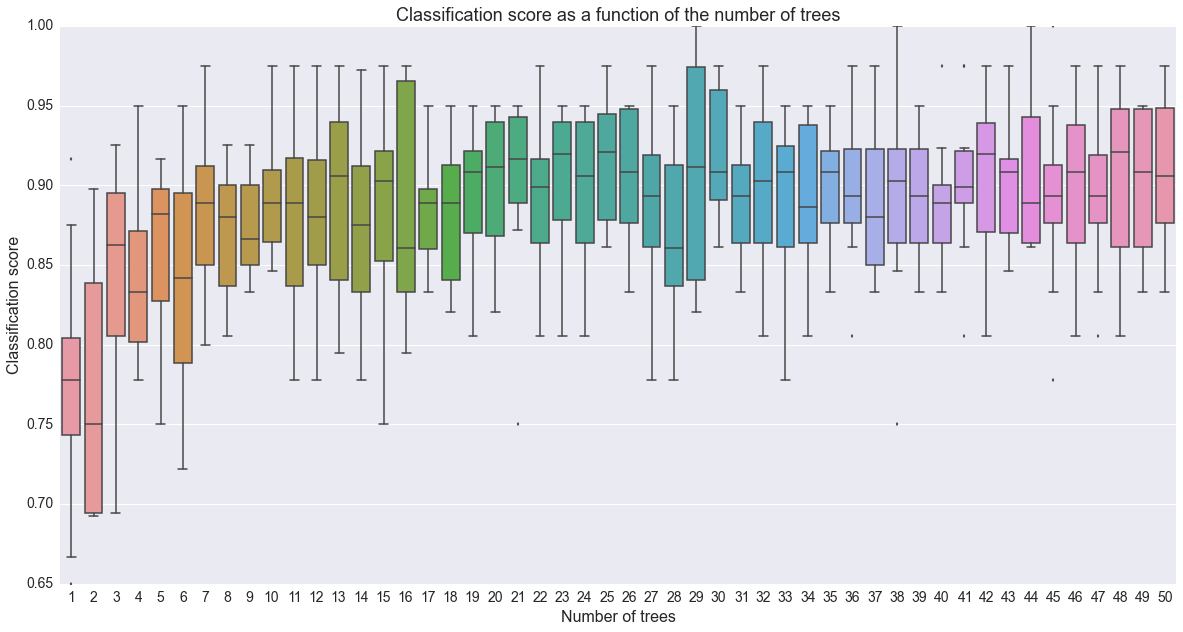

In [49]:
plt.figure(figsize = (20, 10))
sns.boxplot(scores)
plt.xlabel('Number of trees', fontsize = 16)
plt.ylabel('Classification score', fontsize = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.title('Classification score as a function of the number of trees', fontsize = 18)
plt.show()

Accuracy seems to improve with additional trees. Need to consider computational cost of fitting additional treees compared to the small accuracy benefits. 

**Recall** example: airport security screening, where you want a strategy that pulls aside all malicious passengers, even if it means that you also end up pulling aside many innocent people.  

**Precision** example: when selecting job applicants for on-site interviews (which take a lot of time) you want to make sure that every selected applicant is good, and you don't care as much about interviewing every good applicant.


F-1 Score: Harmonic mean of recall and precision
$$F_1 = \frac{2\times\text{recall}\times\text{precision}}{\text{recall} + \text{precision}}.$$
- The harmonic mean of two numbers is closer to the small of the two numbers than the standard arithmetic mean. F1 Score thus tends to favor classifiers that are strong in both precision and recall. 

In [50]:
scores = []
for n in range(1, 51):
    clf = RandomForestClassifier(n_estimators = n)
    score_list = cross_val_score(clf, temp_x, y_labels, cv = 10, scoring = 'f1')
    scores.append(score_list)

/Applications/anaconda/lib/python2.7/site-packages/sklearn/metrics/metrics.py:1771: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


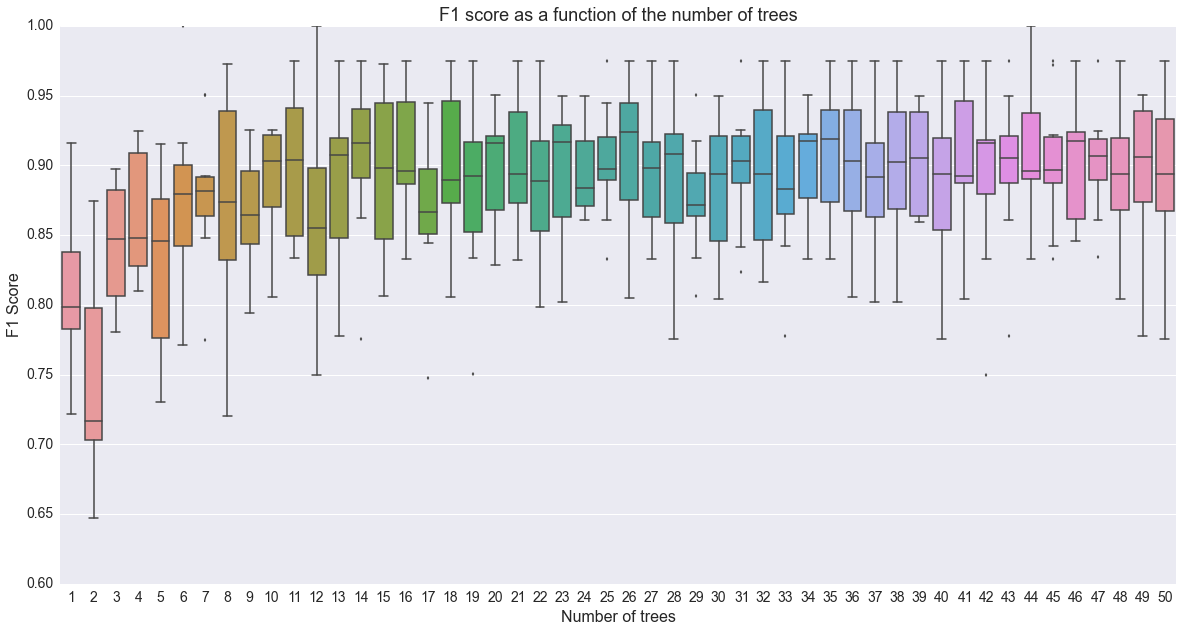

In [51]:
plt.figure(figsize = (20, 10))
sns.boxplot(scores)
plt.xlabel('Number of trees', fontsize = 16)
plt.ylabel('F1 Score', fontsize = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.title('F1 score as a function of the number of trees', fontsize = 18)
plt.show()

### Feature Importance

In [52]:
clf = RandomForestClassifier(n_estimators = 10)
clf.fit(temp_x, y_labels)

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0)

```python
# Sorting list based on values from another list
foo = ["c", "b", "a", "d"]
bar = [1, 2, 3, 4]
print zip(foo, bar) # zip as per given order 
print sorted(zip(foo, bar)) # sort as per the first list
foo, bar = zip(*sorted(zip(foo, bar)))
print foo, "|", bar # prints ('a', 'b', 'c', 'd') | (3, 2, 1, 4)
```

In [53]:
# Create feature importance and feature name list
feature_importance_list = clf.feature_importances_
feature_name_list = temp_x.columns

# Zip both lists
feature_importance, feature_name = zip(*sorted(zip(feature_importance_list, feature_name_list)))

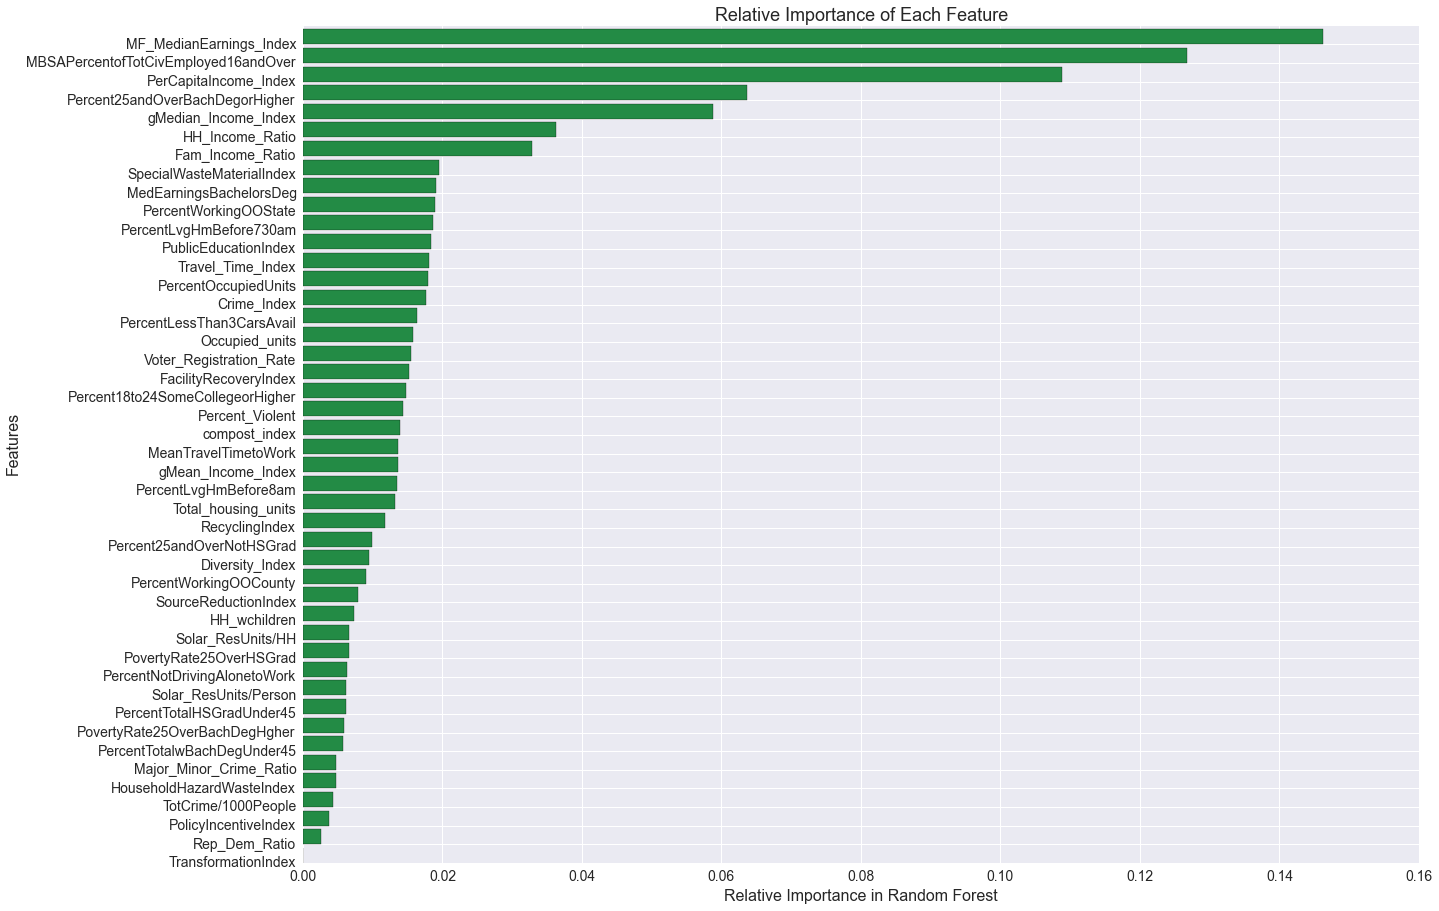

In [54]:
plt.figure(figsize = (20, 15))
plt.barh(range(len(feature_name)), feature_importance, color = '#238b45')#, align = 'center')
plt.yticks(range(len(feature_name)), feature_name)
plt.xlabel('Relative Importance in Random Forest', fontsize = 16)
plt.ylabel('Features', fontsize = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.title('Relative Importance of Each Feature', fontsize = 18)
plt.show()

## Agglomerative Clustering

In [55]:
from sklearn.decomposition import PCA # PCA
from sklearn.lda import LDA # LDA
from sklearn.cluster import KMeans # KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics # Silhouette score

def clustering(n, X, K_Means = True):
    '''
    n = Number of clusters (up to 10). X is numpy array of features
    KMeans = False -> AgglomerativeClustering with cosine distance
    Select linkage: 'complete' or 'average'
    '''
    # KMeans
    if K_Means:
        k_means = KMeans(n_clusters = n)
        k_means.fit(X)
        s_score = metrics.silhouette_score(X, k_means.labels_)
        print 'Clusters: {} --> Silhouette Score: {}'.format(n, s_score)
        labels = k_means.labels_
    else:
        AC = AgglomerativeClustering(n_clusters = n, affinity = 'cosine', linkage = 'average')
        AC.fit(X)
        labels = AC.labels_
    # LDA using labels from KMeans
    lda = LDA()
    lda_comp = lda.fit_transform(X, labels)
    ldadf = pd.DataFrame({'label': labels})
    # Populate the dataframe with LD's 
    for i in range(lda_comp.shape[1]):
        ldadf['ld-%i' % (i+1)] = lda_comp[:, i]
    # Set color
    c0 = sns.color_palette("Set2", 10)[0]
    c1 = sns.color_palette("Set2", 10)[1]
    c2 = sns.color_palette("Set2", 10)[2]
    c3 = sns.color_palette("Set2", 10)[3]
    c4 = sns.color_palette("Set2", 10)[4]
    c5 = sns.color_palette("Set2", 10)[5]
    c6 = sns.color_palette("Set2", 10)[6]
    c7 = sns.color_palette("Set2", 10)[7]
    c8 = sns.color_palette("Set2", 10)[8]
    c9 = sns.color_palette("Set2", 10)[9]

    colors = [c0, c1, c2, c3, c4, c5, c6, c7, c8, c9]
    plt.figure(figsize = (20, 10))
    for label, color in zip(ldadf['label'].unique(), colors):
        # Filter df by status
        mask = ldadf['label'] == label
        print 'Number of points in cluster-{}: {}'.format(label, sum(mask))
        plt.scatter(ldadf[mask]['ld-1'], ldadf[mask]['ld-2'], label = label, color = color, alpha = 0.85, s = 50)
        plt.xlabel("LD-1", fontsize = 16)
        plt.ylabel("LD-2", fontsize = 16)    
        plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
        plt.legend(prop={'size': 14})
        plt.title('LDA via KMeans ({} Clusters)'.format(n), fontsize = 18)
    return labels

In [56]:
# Prepare data
temp = data

# Filter
#temp = temp[temp['Annual_ResPPD_2013'] < 1000]

x = temp.columns.tolist()[12:57] # Subset data by selecting x cols
temp_x = temp[x]

## 1. temp_x: Not normalized
# Replace NaN's with median values
temp_x = temp_x.fillna(temp_x.median())

## 2. x_std: normalized temp_x
# Standardization: rendering data with zero mean and standard deviation 1
x_std = (temp_x - temp_x.mean(axis = 0))/temp_x.std(axis = 0)

## 3. pcs: Principal Component
pca = PCA()
transform = pca.fit_transform(x_std)

# Create a dataframe with PC's
pcdf = pd.DataFrame(transform)

# Change column names
pc_names = []
for i in range(pca.explained_variance_ratio_.shape[0]):
    name = 'pc-%i' % (i+1)
    pc_names.append(name)   
pcdf.columns = pc_names

# Select PC's
pcs = pcdf.values

# Get values (numpy array) 
km_pcs = pcs # n_cluster: 3 or 4. After filtering only 3 looks good
km_temp = temp_x.values # Good Silhouette score but no good clusters.
km_std = x_std.values # n_cluster: 3 or 4. After filtering both look bad

Clusters: 4 --> Silhouette Score: 0.153128632495
Number of points in cluster-3: 135
Number of points in cluster-1: 166
Number of points in cluster-2: 61
Number of points in cluster-0: 16


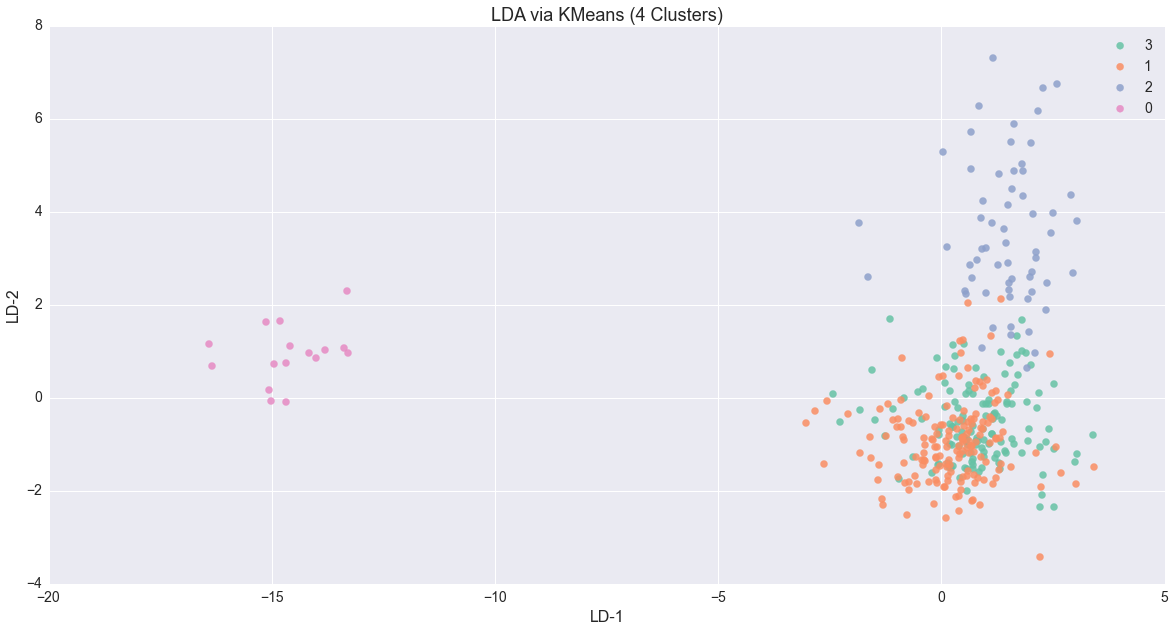

In [57]:
ac_labels = clustering(4, km_std, K_Means=True)

## Decile Calculation as per Kyle's post on slack

In [58]:
# investment_df['decile'] = pd.qcut(investment_df['investment'], 10, labels=False)
temp = data
temp['Deciles'] = pd.qcut(temp['Annual_ResPPD_2013'], 10, labels = np.arange(0, 10, 1))
temp['Quintuple'] = pd.qcut(temp['Annual_ResPPD_2013'], 5, labels = np.arange(0, 5, 1))

In [59]:
temp.groupby(['Quintuple'])[['Annual_ResPPD_2013']].mean().reset_index()

,Quintuple,Annual_ResPPD_2013
0,0,2.706410
1,1,3.539189
2,2,4.141096
3,3,4.895588
4,4,79.601370


## PCA Biplot 

In [60]:
# Create feature importance and feature name list
feature_importance_list = clf.feature_importances_
feature_name_list = temp_x.columns

# Zip both lists and sort in descending order
#featureImportance = sorted(zip(feature_importance_list, feature_name_list), reverse = True)
featureImportance = zip(feature_importance_list, feature_name_list)

# Get feature names when feature importance > 0.05
feature_names = []
for i in featureImportance:
    if i[0] >= 0.05:
    #if i[0] >= 0.02 and i[0] < 0.05:
    #if i[0] >= 0.01 and i[0] < 0.02:
    #if i[0] > 0 and i[0] < 0.01:
        feature_names.append(i[1])
        
feature_names = feature_names

In [61]:
temp = data

## Select important features
pca_data = temp[feature_names]

pca_data['Label'] = y_labels
## Replace NaN's with median values
pca_data = pca_data.fillna(pca_data.median())

## normalized x
# Standardization: rendering data with zero mean and standard deviation 1
pca_std = (pca_data - pca_data.mean(axis = 0))/pca_data.std(axis = 0)

# Set Location as index
pca_std.index = temp['Jurisdiction']
#pca_std.index = pca_std.index.format()


In [62]:
# Ref-1: https://sukhbinder.wordpress.com/2015/08/05/biplot-with-python/
# Ref-2: https://github.com/teddyroland/python-biplot/blob/master/biplot.py

def biplot(data, factor):
    f = factor
    # Create an instance of PCA
    pca = PCA()
    # Fit data
    pca.fit(data)
    # Get the directions of maximum variance in the data
    x_vector = pca.components_[0]
    y_vector = pca.components_[1]
    # Get the principal components or apply dimensionality reduction
    x = pca.transform(data)[:, 0]
    y = pca.transform(data)[:, 1]
    # Visualize projection
    plt.figure(figsize = (20, 10))
    plt.xlabel("PC-1", fontsize = 16)
    plt.ylabel("PC-2", fontsize = 16)  
    plt.xlim(x.min()*f, x.max()*f)
    plt.ylim(y.min()*f, y.max()*f)
    plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
    plt.title('PCA Biplot', fontsize = 18)
    # Plot vectors (i.e. data columns)
    for i in range(len(x_vector)):
        plt.arrow(0, 0, x_vector[i]*max(x), y_vector[i]*max(y), color = '#cb181d', head_width = 0.05, head_length = 0.1)
        plt.text(x_vector[i]*max(x), y_vector[i]*max(y), list(data.columns.values)[i], color = '#cb181d', fontsize = 12)
    # Plot principan component values (i.e. rows)
    for i in range(len(x)):
        plt.scatter(x[i]*f, y[i]*f, color = '#238b45', alpha = 0.5, s = 30)
        plt.text(x[i]*f, y[i]*f, list(data.index)[i], color = '#2171b5', fontsize = 10)
        
# Note: Biplot arrows that point in the direction of increasing values for that variable.    

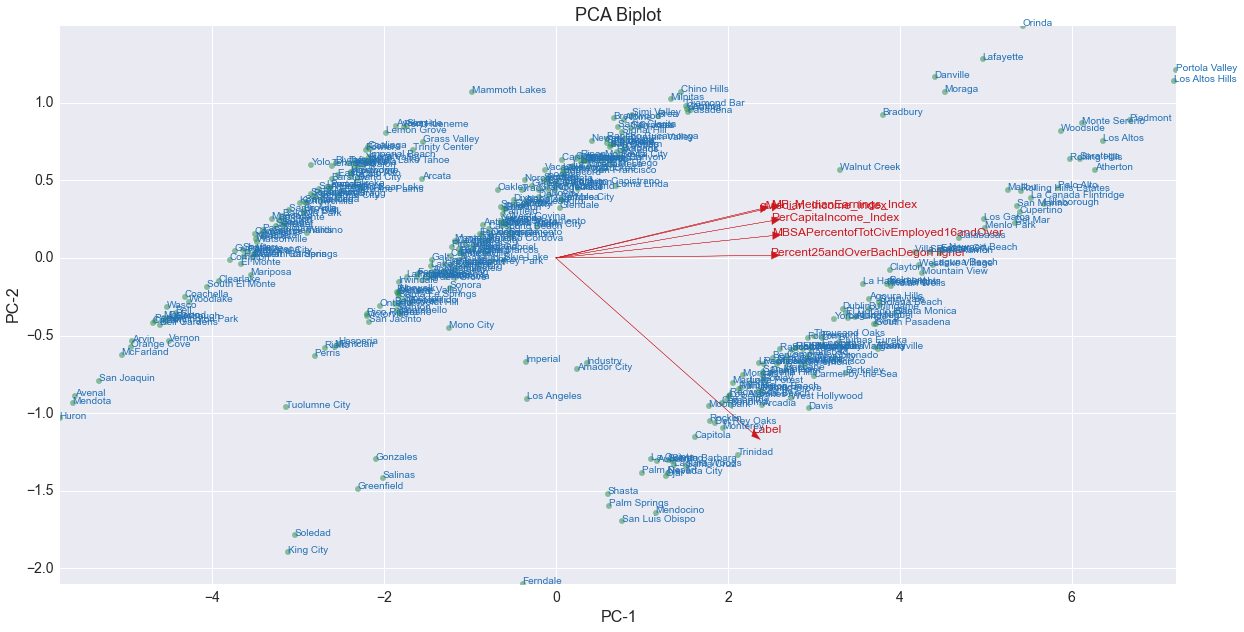

In [63]:
biplot(pca_std, 1.2)

In [64]:
temp = data

## Select important features
pca_data = temp[feature_names]

## Replace NaN's with median values
pca_data = pca_data.fillna(pca_data.median())

## normalized x
# Standardization: rendering data with zero mean and standard deviation 1
pca_std = (pca_data - pca_data.mean(axis = 0))/pca_data.std(axis = 0)

# Set Location as index
pca_std.index = temp['Jurisdiction']
pca_std.index = pca_std.index.format()

# Y labels
pca_std['Label'] = y_labels

In [65]:
pca_std.head()

,PerCapitaIncome_Index,gMedian_Income_Index,MF_MedianEarnings_Index,Percent25andOverBachDegorHigher,MBSAPercentofTotCivEmployed16andOver,Label
Adelanto,-1.812000,-1.051798,-0.854726,-1.225179,-0.859985,0
Agoura Hills,1.094060,1.413187,1.217647,1.163099,1.186004,3
Alameda,0.711581,0.676206,0.595487,0.842968,0.654244,3
Albany,0.646983,0.660995,0.921728,2.032026,1.908705,3
Alhambra,-0.197302,-0.197403,-0.384694,0.060426,-0.008265,1


In [66]:
pca_std.columns.tolist()[:-1]

['PerCapitaIncome_Index',
 'gMedian_Income_Index',
 'MF_MedianEarnings_Index',
 'Percent25andOverBachDegorHigher',
 'MBSAPercentofTotCivEmployed16andOver']

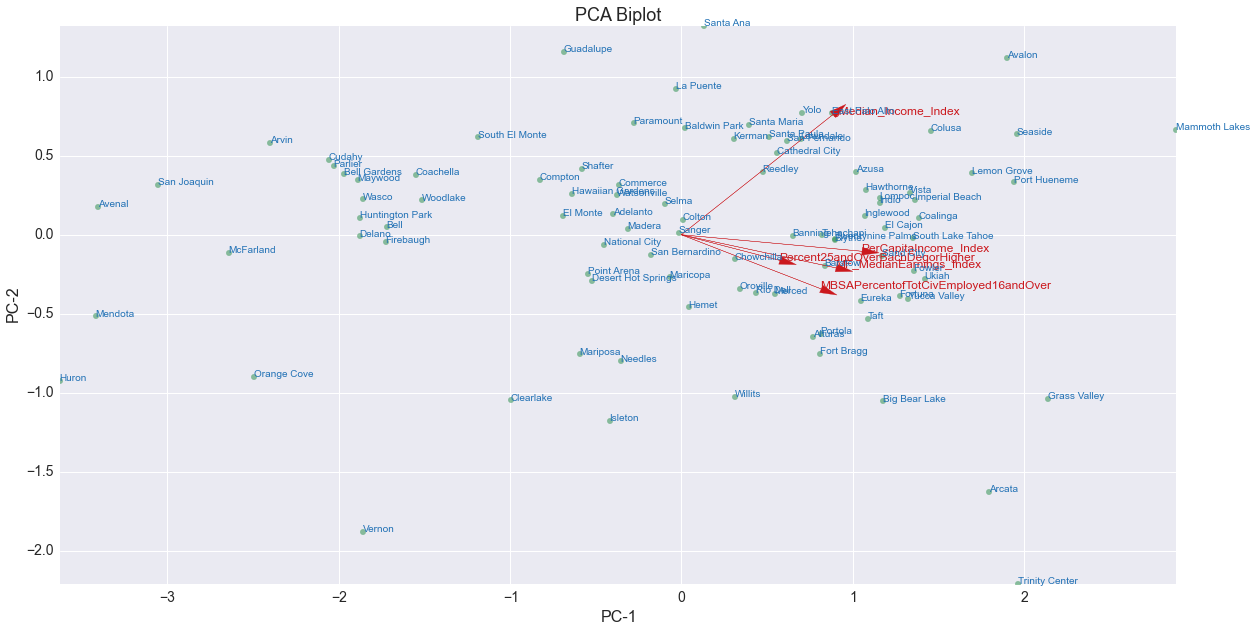

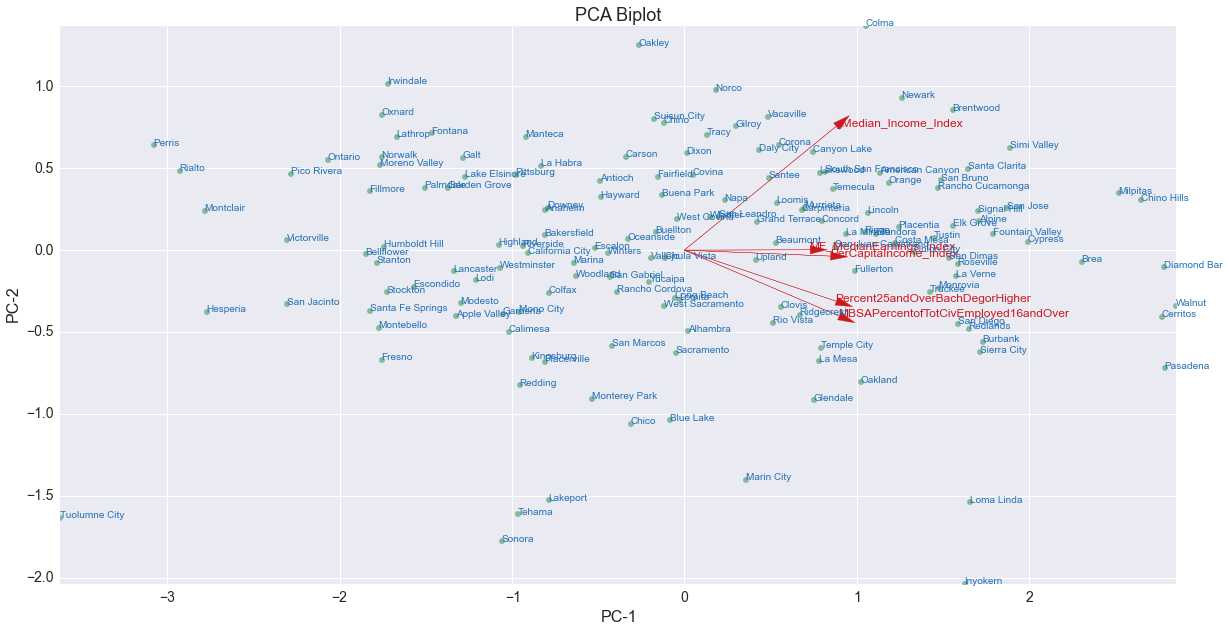

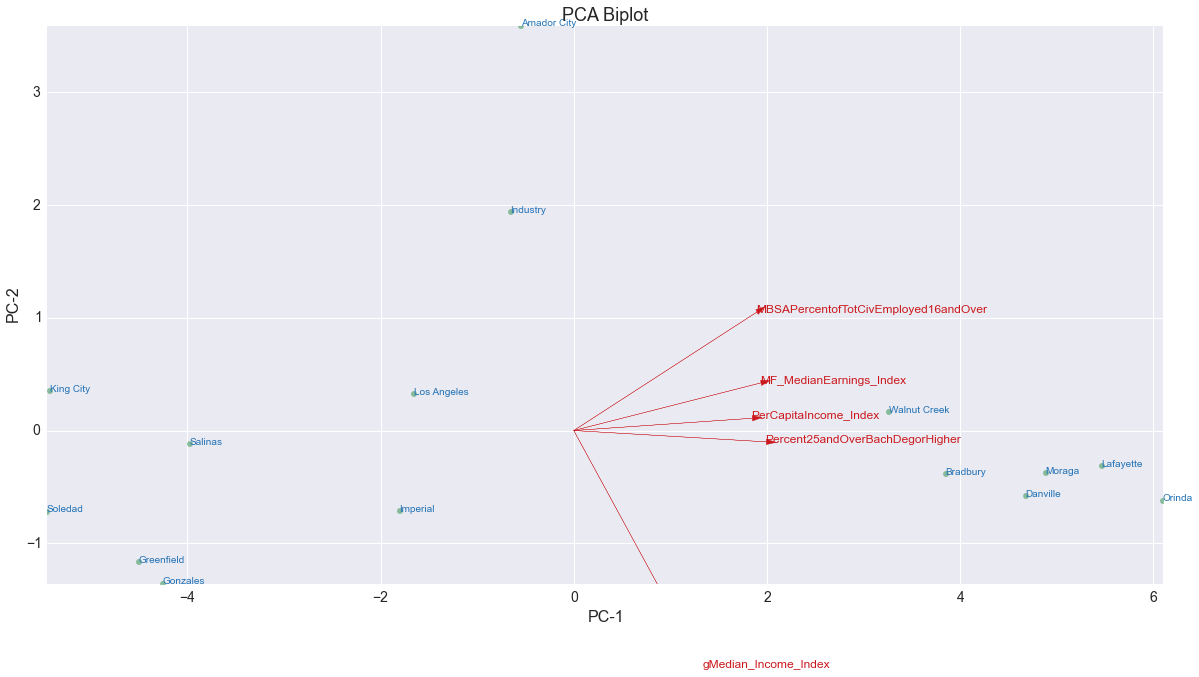

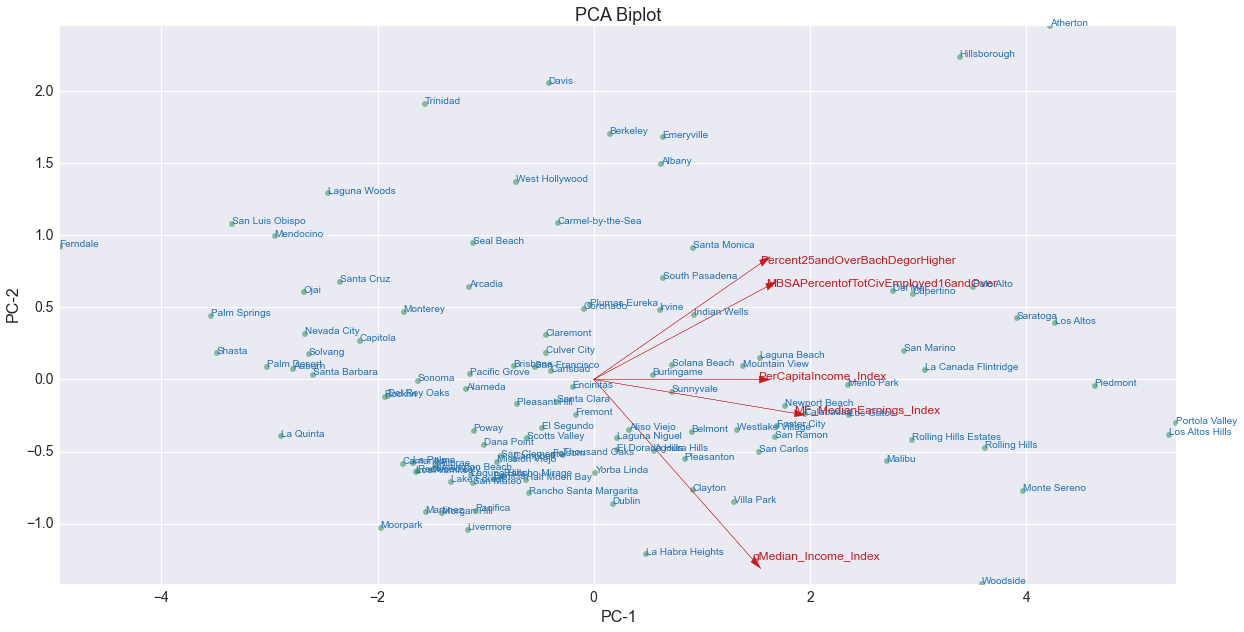

In [67]:
for i in set(y_labels):
    mask = pca_std['Label'] == i
    mask_df = pca_std[mask]
    biplot(mask_df[mask_df.columns.tolist()[:-1]], 1.5)

In [68]:
data[['Jurisdiction']][(data['Target_ResPPD_2013'] - data['Annual_ResPPD_2013']) < 0]

,Jurisdiction
83,Daly City
89,Delano
107,Ferndale
130,Guadalupe
142,Huron
149,Inyokern
198,Mariposa
203,Mendota
226,Nevada City
258,Point Arena


In [69]:
check = data
check['Diff'] = check['Target_ResPPD_2013'] - check['Annual_ResPPD_2013']
check[['Jurisdiction', 'Diff']][check['Diff'] < 0]

,Jurisdiction,Diff
83,Daly City,-0.3
89,Delano,-0.3
107,Ferndale,-0.6
130,Guadalupe,-0.7
142,Huron,-0.1
149,Inyokern,-0.3
198,Mariposa,-0.4
203,Mendota,-0.6
226,Nevada City,-0.6
258,Point Arena,-1.9


Anything that ends in index is continuous.
45 --> FacilityRecoveryIndex - 
46 --> HouseholdHazardWasteIndex
47 --> PolicyIncentiveIndex
48 --> PublicEducationIndex
49 --> RecyclingIndex
50 --> SourceReductionIndex
51 --> SpecialWasteMaterialIndex
52 --> TransformationIndex
53 --> HH_wchildren
54 --> Total_housing_units
55 --> Occupied_units
56 --> PercentOccupiedUnits